<a href="https://colab.research.google.com/github/z0rus26/signals_statistics/blob/main/Distribuciones_de_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuciones de probabilidad con Python

Una variable aleatoria es una función que asigna un valor, usualmente numérico, al resultado de un experimento aleatorio.
Estas variables aleatorias son medidas y analizadas en términos de sus propiedades estadísticas y probabilísticas, de las cuales una característica subyacente es su función de distribución. A pesar de que el número potencial de distribuciones puede ser muy grande, en la práctica, un número relativamente pequeño se utilizan; ya sea porque tienen características matemáticas que las hace fáciles de usar o porque se asemejan bastante bien a una porción de la realidad, o por ambas razones combinadas.

# Importancia de conocer las distribuciones
Muchos resultados en las ciencias se basan en conclusiones que se extraen sobre una población general a partir del estudio de una muestra de esta población. Este proceso se conoce como inferencia estadística; y este tipo de inferencia con frecuencia se basa en hacer suposiciones acerca de la forma en que los datos se distribuyen, o requiere realizar alguna transformación de los datos para que se ajusten mejor a alguna de las distribuciones conocidas y estudiadas en profundidad.

Las distribuciones de probabilidad teóricas son útiles en la inferencia estadística, su objetivo  es obtener conclusiones útiles para hacer deducciones sobre una totalidad, basándose en la información numérica de la muestra. Si la distribución real de un conjunto de datos dado es razonablemente cercana a la de una distribución de probabilidad teórica, muchos de los cálculos se pueden realizar en los datos reales utilizando hipótesis extraídas de la distribución teórica.




In [2]:
#librerias necesarias para la ejecución del entorno
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

np.random.seed(2016) # replicar random

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

# Un histograma 
Es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua (como la longitud o el peso). [Tomado de wikipedia, Enciclopedia libre]

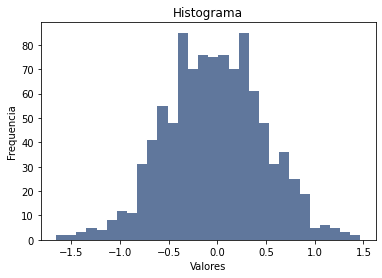

In [3]:
# Graficando un histograma
# media y desvio estandar
mu, sigma = 0, 0.5 
#muestra de datos random
datos = np.random.normal(mu, sigma, 1000) 

# histograma de distribución normal
cuenta, cajas, ignorar = plt.hist(datos, 30)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Histograma')
plt.show()

# Función de Masa de Probabilidad


Esta función relaciona cada valor con su probabilidad, a diferencia del histograma que relaciona frecuencias.
Esta función se encuentra normalizada para que el valor total de probabilidades sea 1.
La gran ventaja de usar esta función, es la posibilidad de relacionar dos distribuciones de datos distintas sin tener en cuenta la magnitud de sus muestras.

La desventaja de usar esta distribución radica en que cuando se usan gran cantidad de valores, la probabilidad asociada a cada valor se hace mas pequeña y produce un efecto de ruido mayor.


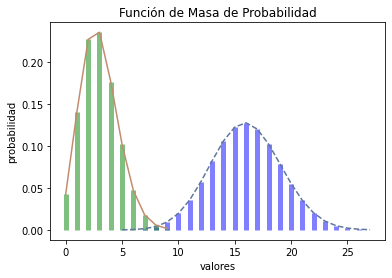

In [4]:
# parametros de forma de la distribución binomial
n, p = 40, 0.4
# parametros de forma de la distribución binomial
n_1, p_1 = 30, 0.1

x = np.arange(stats.binom.ppf(0.0001, n, p),
              stats.binom.ppf(0.9999, n, p))
x_1 = np.arange(stats.binom.ppf(0.0001, n_1, p_1),
              stats.binom.ppf(0.9999, n_1, p_1))
# Función de Masa de Probabilidad
fmp = stats.binom.pmf(x, n, p) 
# Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) 
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# Función de Distribución Acumulada

Para evitar el problema mencionado anteriormente, se puede usar la función de distribución acumulada, esta puede ser usada tanto discreta como continuamente, se relacionan entonces los valores con su correspondiente percentil, el cuál corresponde  a la medida de posición usada en estadística que indica, una vez ordenados los datos de menor a mayor, el valor de la variable por debajo del cual se encuentra un porcentaje dado de observaciones en un grupo. [Tomado de wikipedia, Enciclopedia Libre].
Se distinguen por su forma de 'S' y relacionan cualquier valor x de la variable aleatoria X, con la probabilidad de observar valores “menores o iguales” a dicho valor x.

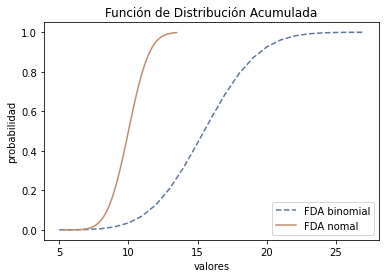

In [5]:
#  Función de Distribución Acumulada 
x_1 = np.linspace(stats.norm(10, 2).ppf(0.01),
                  stats.norm(10, 1.5).ppf(0.99), 100)
# Función de Distribución Acumulada
fda_binom = stats.binom.cdf(x, n, p) 

# Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) 

# Gráficas
plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1, fda_normal, label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

# Función densidad de probabilidad
Esta función es equivalente a la función de distribusion de masas pero siendo para distribuciones continuas, tambien representa la derivada de la función de distribución acumulada.
Tiene una forma partícular de campana, donde hay mas datos cerca de la media, y pocos alejados de ella en sus extremos.


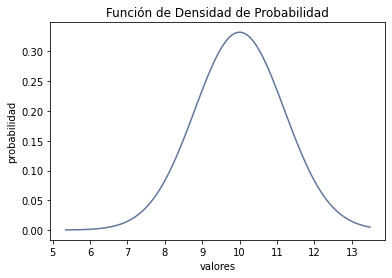

In [12]:
FDP = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.show()

# Distribución de variable discreta

Se denomina distribución de variable discreta a aquella cuya función de probabilidad solo toma valores positivos en un conjunto de valores de $X$ finito o infinito numerable. A dicha función se le llama función de masa de probabilidad. En este caso la distribución de probabilidad es la suma de la función de masa, por lo que tenemos entonces que:

${\displaystyle F(x)=P(X\leq x)=\sum _{k=-\infty }^{x}f(k)}$

Y, tal como corresponde a la definición de distribución de probabilidad, esta expresión representa la suma de todas las probabilidades desde $-\infty$  hasta el valor $x$.


Aconinuación se expondran 3 casos de distribuciones de variable discreta.

## Distribución Poisson

La función de masa de probabilidad de la districusion es:

${\displaystyle f(k,\lambda )={\frac {e^{-\lambda }\lambda ^{k}}{k!}}}$




*   $K$ número de ocurrencias del evento
*   $\lambda$ entero positivo que representa cuantas veces se espera que pase algun fenómeno en un intervalo dado.

 La Distribución Poisson describe la probabilidad de encontrar exactamente $k$ eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante $\lambda$. Se puede usar para cuantificar el numero de fallas de construcción de un lote de cualquier producto.






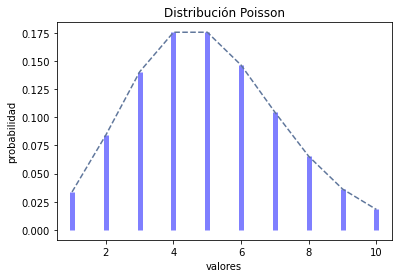

In [15]:

# Graficando Poisson
mu = 5 # parametro de forma 
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# Distribución binomial

Distribución de probabilidad que describe las posibilidades que hay de obtener fracaso o exito, al realizar un experimento de Bernoulli en una secuencia de n ensayos independientes entre sí.

${\displaystyle \!f(x)={n \choose x}p^{x}(1-p)^{n-x},\,\,\,\,0\leq p\leq 1}$

donde ${\displaystyle x=\{0,1,2,\dots ,n\},}$

siendo ${\displaystyle \!{n \choose x}={\frac {n!}{x!(n-x)!}}\,\!}$ 



*   $n$: número de ensayos.
*   $p$: probabilidad de éxito.
*   $X$: variable aleatoria.


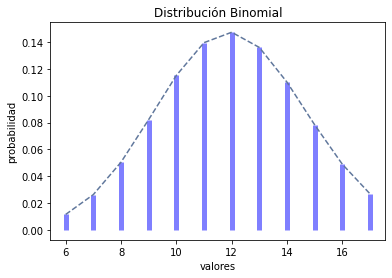

In [16]:

# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# Distribuciones continuas

En las distribuciones continuas las variables pueden tomar valores dentro de un rango específico.


# Distribución normal

En estadística y probabilidad se llama distribución normal, distribución de Gauss, distribución gaussiana o distribución de Laplace-Gauss, a una de las distribuciones de probabilidad de variable continua que con más frecuencia aparece en estadística y en la teoría de probabilidades

${\displaystyle {\begin{aligned}\Phi _{\mu ,\sigma ^{2}}(x)&{}=\int _{-\infty }^{x}\varphi _{\mu ,\sigma ^{2}}(u)\,du\\&{}={\frac {1}{\sigma {\sqrt {2\pi }}}}\int _{-\infty }^{x}e^{-{\frac {(u-\mu )^{2}}{2\sigma ^{2}}}}\,du,\quad x\in \mathbb {R} .\\\end{aligned}}}$

donde:

*   $\mu$ es la media,valor esperado.
*   $\sigma$ desviación típica estandar.
*   $\sigma^2$ varianza.
*   $\varphi$ desviación típica estandar.




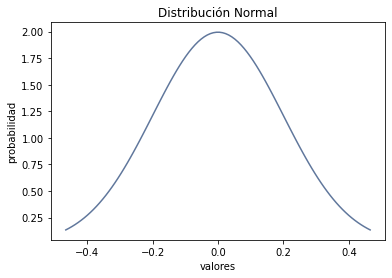

In [17]:

# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# Distribución log-normal
Distribución de probabilidad continua de una variable aleatoria cuyo logaritmo está normalmente distribuido.


${\displaystyle f(x;\mu ,\sigma )={\frac {1}{x\sigma {\sqrt {2\pi }}}}e^{-(\ln(x)-\mu )^{2}/2\sigma ^{2}}}$

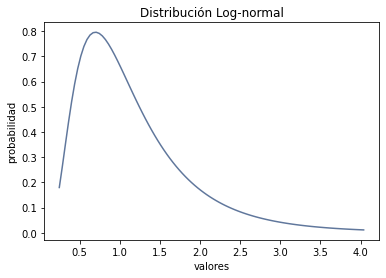

In [18]:

# Graficando Log-Normal
sigma = 0.6 # parametro
lognormal = stats.lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()